# Caracterização de eletrofáceis por meio de inteligência artificial com abordagem supervisionada
## Treinamento, teste e análise do modelo

- **Nome do Arquivo**: treinamento_modelo.ipynb
- **Autor**: Rafael Takeguma Goto
- **Versão**: 1.0
- **Data de Criação**: 24/06/2024
- **Data de Modificação**: 25/06/2024

### Descrição: 
Este notebook contém o a etapa do trabalho referente à realização do treinamento, teste e análise do algoritmo de identificação de eletrofáceis a partir dos dados rotulados.

### Leitura do conjunto de dados

O conjunto de dados é constituído por arquivos csv gerados a partir da fusão da extração dos arquivos dlis com os arquivos agp de cada poço.

In [12]:
import glob
import pandas as pd

leituras = []      # Armazena as leituras dos arquivos .csv
nomes = []          # Armazena os nomes obtidos das leituras

for file in glob.glob(r'**/Dados-filtrados' + "/*.csv", recursive=True):
    try:
        # Salva os dados da leitura
        leitura = pd.read_csv(f'{file}')
        leituras.append(leitura)

        # Salva o nome do poço
        nomes.append(file[16:21])
    except:
        print(file)

In [15]:
# Casa itens da lista 'nomes' com os itens da lista 'leituras'
pares = zip(nomes, leituras)

# Cria dicionário 'dados'
dados = dict(pares)

### Número de registros

O conjunto de dados utilizado neste trabalho possui um total de X registros. O poço P_574 é o que possui o maior número de registros, com 4546. O poço com o menor número de registros é o P_689, com 1620.

In [25]:
registros = {}      # Dicionário para armazenar o número de registros de cada poço

for key, poco in dados.items():
    registros[key] = poco.shape[0]

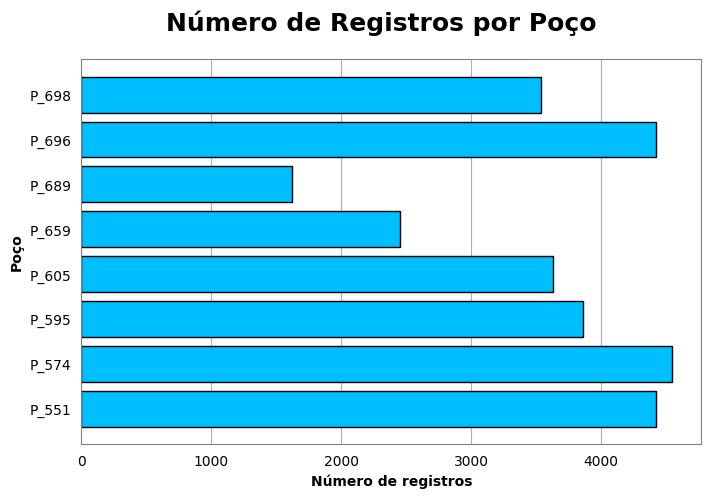

In [32]:
import matplotlib.pyplot as plt

pocos = list(registros.keys())
num_registros = list(registros.values())

plt.figure(figsize=(8,5))

# barras do gráfico de barras
bars_regions = plt.barh(pocos, num_registros, edgecolor='black', color='deepskyblue', zorder=2)

# Objeto dos eixos
ax = plt.gca()

# Muda a cor dos eixos
ax.spines['top'].set_color('gray')       
ax.spines['bottom'].set_color('gray')  
ax.spines['left'].set_color('gray')     
ax.spines['right'].set_color('gray')  

# Remove os tracinhos dos eixos
ax.tick_params(axis='x', which='both', bottom=False, top=False)  
ax.tick_params(axis='y', which='both', left=False, right=False)  

# X axis interval
# plt.xlim(80, 85)

# Add um grid
plt.grid(True, axis='x', zorder=0)

# Título do gráfico
plt.suptitle('Número de Registros por Poço', fontsize=18, fontweight='bold')

# Subtitle do gráfico
# plt.title('Data from the Ministry of Health, Labour and Welfare', fontsize=12)

# labels x e y
plt.xlabel('Número de registros', fontweight='bold')
plt.ylabel('Poço', fontweight='bold')

plt.show()

### Divisão do conjunto de dados
A divisão dos dados que serão utilizados pelo algoritmo é feita com base no método *holdout*, do qual divide os dados em proporção de p para o treinamento do algoritmo e (1-p) para o teste do algoritmo. Foi definido p como 2/3, 66.67% dos dados para o treinamento e 33.34% para teste, como geralmente é feito (FACELI et al. 2011).